In [3]:
import scipy.io

In [4]:
from sklearn import preprocessing

In [5]:
import numpy as np

In [5]:
import random

In [2]:
print("x")

x


In [6]:
import math

In [7]:
mat = scipy.io.loadmat('/Users/yzh/Desktop/cour/supervised/hw03_DS5220_Data/data1.mat')

In [50]:
mat2 = scipy.io.loadmat('/Users/yzh/Desktop/cour/supervised/hw03_DS5220_Data/data2.mat')

In [20]:
print("class is balanced since class-1 occupies proportion of: "+str(mat["Y_trn"].mean()))

class is balanced since class-1 occupies proportion of: 0.5


In [21]:
scaler = preprocessing.StandardScaler().fit(mat["X_trn"]) #feature scaling
Xtrn   = scaler.transform(mat["X_trn"]) 
Xtst=scaler.transform(mat["X_tst"]) 

In [22]:
Xtrn=np.append(Xtrn,np.ones((Xtrn.shape[0],1)),axis=1)
Xtst=np.append(Xtst,np.ones((Xtst.shape[0],1)),axis=1)

In [24]:
def ridgeLogis(Xtrn, Ytrn, learnRate,reguPara,stopWhen):
    featureNum=Xtrn.shape[1]
    weight=np.zeros((featureNum,1))
    while True:
      vecSum=np.zeros((featureNum,1))
      for row in range(0,Xtrn.shape[0]):
        feature=Xtrn[row,:]
        feature.shape=(featureNum,1)
        vecSum=vecSum-feature*(np.asscalar(Ytrn[row,0]) - \
        1/(1+math.exp(-np.asscalar(np.matmul(weight.transpose(),
                                             feature)))))
      vecSum=vecSum+2*reguPara*weight
      if np.asscalar(np.matmul(vecSum.transpose(),vecSum))<=stopWhen: #10**(-3)
          return weight+(-learnRate)*vecSum
      weight=weight+(-learnRate)*vecSum   

In [87]:
weight=ridgeLogis(Xtrn,mat["Y_trn"],0.01,0,10**(-2))

In [26]:
def predict(Xtst,weight):
  result=[]
  for row in range(0,Xtst.shape[0]):
    feature=Xtst[row,:]
    feature.shape=(1,Xtst.shape[1])
    result.append(1/(1 +math.exp(-np.asscalar(np.matmul(feature,weight))) ))
  return result

In [48]:
result=np.array(predict(Xtst,weight))
trainScore=np.array(predict(Xtrn,weight))

In [46]:
from sklearn.metrics import roc_curve, auc #use Area under roc-curve Metric
a,b,c=roc_curve(mat["Y_tst"].flatten(),result)
print("test error: Area under roc-curve is "+str(auc(a,b)))

test error: Area under roc-curve is 1.0


In [49]:
a,b,c=roc_curve(mat["Y_trn"].flatten(),trainScore)
print("training error: Area under roc-curve is "+str(auc(a,b)))

training error: Area under roc-curve is 1.0


In [91]:
if np.asscalar(weight[0])!=0:
        slope=np.asscalar(weight[1])/np.asscalar(weight[0])
        intercept=np.asscalar(weight[2])/np.asscalar(weight[0])

In [4]:
import matplotlib.pyplot as plt

In [29]:
import matplotlib
import pylab

In [3]:
%matplotlib inline

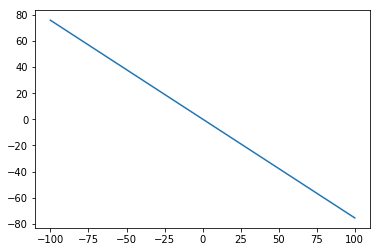

In [108]:
plt.plot([-100,100],np.linspace(-100,100,2)*slope+intercept)#order of appearance

In [7]:
plt.show()

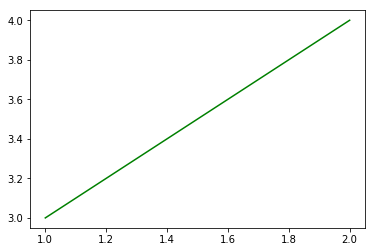

In [8]:
plt.plot([1,2],[3,4],'green')

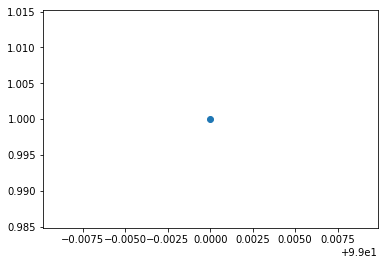

In [5]:
plt.scatter(99,1)

In [9]:
plt.savefig('myfig2.png')

In [43]:
plt.clf

<function matplotlib.pyplot.clf>